# Bayesian Optimization for Likelihood-Free Inference of Simulator-Based Statistical Models

The true likelihood function we want to retrieve using a simulator-based model so that $y_{\theta} \sim p_{y|\theta}$

$\mathcal{L}(\theta) = p_{y|\theta}(y_0|\theta)$ -> true likelihood based on observed data

The approximation of the likelihood function is based on some measurement of discrepancy $\Delta_{\theta}$ between the observed data $y_o$ and data $y_{\theta}$ simulated with parameter value $\theta$. $\Delta_{\theta}$ is used to approximate $\mathcal{L}$ by $\hat{L}$.

The approximation is based on reduction of the data to some features, or summary statistics $\Phi$. The purpose of the summary statistics is to reduce the dimensionality and to filter out information which is not deemed relevant for the inference of $\theta$. 
So $\mathcal{L}$ is replaced with $L$: 

$L(\theta)=p_{\Phi|\theta}(\Phi_0|\theta)$ -> true likelihood based on summary statistics

$L(\theta)$ is a valid likelihood function but for the inference of $\theta$ given $\Phi$ and not for the inference of $\theta$ given $y_0$, in contrast to $\mathcal{L}$, unless $\Phi$ happens to be statistically sufficient.

Howeverm $L(\theta)$ is not known, because the pdf $p_{\Phi|\theta}$ is of unknown analytical form, which is a property inherited from $p_{y|\theta}$. So we again have to approximate $L(\theta)$, which we denote as a pratical approximation with finite resources by $\hat{L}(\theta)$

$\hat{L}(\theta)$ -> computable approximation of $L$

## Parametric Approximation of the Likelihood

If $\Phi_{\theta}$ is obtained via averaging (choose $\theta$ and simulate $N$ datasets from the simulator, calculate $\Phi_{\theta}$ for each and calculate the average), the central limit theorem suggests that the pdf may be well approximated by a Gaussian distribution if the number of samples n is sufficiently large,

$p_{\Phi|\theta}(\phi|\theta) \approx \cfrac{1}{(2\pi)^{(p/2)}|\det \Sigma_{\theta}|^{1/2}} \exp (-\cfrac{1}{2}(\phi - \mu_{\theta})^T\Sigma_{\theta}^{-1}(\phi - \mu_{\theta}))$, with $p$ the dimension of $\Phi_{\theta}$

The corresponding likelihood function is $\tilde{L}_s = \exp(\tilde{l}_s)$

$\tilde{l}_s(\theta) = -\cfrac{p}{2}\log(2\pi) - \cfrac{1}{2}\log|\det \Sigma_{\theta}| -\cfrac{1}{2}(\phi_o - \mu_{\theta})^T\Sigma_{\theta}^{-1}(\phi_o - \mu_{\theta}))$

$\mu_{\theta}$ and $\Sigma_{\theta}$ are generally not known, but the simulator can be used to estimate them via sample average $E^N$ over N independently generated summary statistics (for a given $\theta$),

$\hat{\mu}_{\theta} = E^N[\Phi_{\theta}] = \cfrac{1}{N} \sum_i \Phi_{\theta}^{(i)}, \quad \Phi_{\theta}^{(i)} \overset{i.i.d}{\sim } p_{\Phi|\theta}, \quad \hat{\Sigma}_{\theta} = E^N[(\Phi_{\theta} - \hat{\mu}_{\theta})(\Phi_{\theta} - \hat{\mu}_{\theta})^T]$

A computable estimate $\hat{L}_s^N$ is then given by $\hat{L}_s^N = \exp(\hat{l}_s^N)$. This approximation was named "synthetical likelihood" by Wood (2010)

## Nonparametric Approximation of the Likelihood

If we dont know or dont want to assume a parametric model for the pdf $p_{\Phi|\theta}$ of the summary statistics, we can approximate it by a kernel density estimate,

$p_{\Phi|\theta}(\phi|\theta) \approx E^N[K(\phi,\Phi_{\theta})], \quad E^N[K(\phi,\Phi_{\theta})] = \cfrac{1}{N} \sum_i K(\phi, \Phi_{\theta}^{(i)})$

An approximation of the likelihood function $L(\theta)$ is given by $\hat{L}_K^N(\theta)$,

$\hat{L}_K^N(\theta) = E^N[K(\Phi_0, \Phi_{\theta})]$

We can rewrite $K$ in another form as $\kappa(\Delta_{\theta})$ where $\Delta_{\theta} \geq 0$ depends on $\Phi_o$ and $\Phi_{\theta}$, and $\kappa$ is a univariate non-negative function not depending on $\theta$. Kernels $K$ are generally such that $\kappa$ has a maximum at zero (because kernels measure similarity and that is the greatest when two values are equal). 

Now we can express $\hat{L}_K^N(\theta)$ with $\kappa$ which we denote with $\hat{L}_{\kappa}^N$

$\hat{L}_{\kappa}^N (\theta) = E^N[\kappa(\Delta_{\theta})]$

When we denote the empirical expectation $E^N[\Delta_{\theta}]$ as $\hat{J}(\theta)$ it can be shown that for convex functions $\kappa$ $\kappa(\hat{J})$ is a lower bound for the likelihood.

$\hat{L}_{\kappa}^N(\theta) \geq \kappa(\hat{J}^N (\theta))$,

which means we do not have to calculate $\kappa(\Delta_{\theta})$ for each sample, but instead calculate the empirical expectation over the discrepancies $E^N[\Delta_{\theta}]$ and apply $\kappa$ only once.

Since $\kappa$ is maximum at zero, the lower bound is maximized by minimizing the conditional empirical expectation $\hat{J}^N (\theta)$

A popular choice for $\kappa$ is a uniform kernel $\kappa = \kappa_u$ which lead to the approximate likelihood $\hat{L}_u^N$

$\kappa_u(u) = c\chi_{[0,h)}(u), \quad \hat{L}_u^N (\theta) = cP^N(\Delta_{\theta} < h)$,

where the indicator function $\chi$ equals one if $u \in [0,h)$ and zero otherwise. $c$ is a scaling parameter and does not depend on $\theta$ and $h$ is the bandwidth  of the kernel and acts as acceptance/rejection threshold.

A lower bound for $\hat{L}_u^N$ is given by:

$\hat{L}_u^N(\theta) = c[1 - P^N(\Delta_{\theta}^u \geq h] \geq c[1 - \cfrac{1}{h}E^N[\Delta_{\theta}]] = c[1 - \cfrac{1}{h} \hat{J}^N(\theta)]$,

so again, minimizing $\hat{J}^N(\theta)$ maximizies the likelihood $\hat{L}_u^N(\theta$

## Relation between Nonparametric and Parametric Approximation

A special choice of Kernel allows us to embed the synthetic likelihood approch into the nonparametric approach

For the Gaussian kernel, we have that $K(\Phi_i, \Phi_{\theta}) = K_g(\Phi_o - \Phi_{\theta})$,

$K_g(\Phi_o - \Phi_{\theta}) = \cfrac{1}{(2\pi)^{p/2}} \cfrac{1}{|\det C_{\theta}|^{1/2}} \exp \left( -\cfrac{(\Phi_o - \Phi_{\theta})^T C^{-1}_{\theta} (\Phi_0 - \Phi_{\theta})}{2} \right)$,

where $C_{\theta}$ is a positive definite bandwith matrix possibly depending on $\theta$. The kernel $K_g$ corresponds to $\kappa = \kappa_g$ and $\Delta_{\theta} = \Delta_{\theta}^g$,

$\kappa_g(u) = \cfrac{1}{(2\pi)^{p/2}} \exp(-\cfrac{u}{2}), \quad \Delta_{\theta}^g = \log|\det C_{\theta}| + (\Phi_o - \Phi_{\theta})^T C^{-1}_{\theta} (\Phi_0 - \Phi_{\theta})$

The function $\kappa_g$ is convex and thus yields a lower bound for $\hat{L}^N(\theta)=\hat{L}_g^N(\theta)$

$\hat{J}_g^N(\theta) = E^N[\Delta_{\theta}^g] \Rightarrow \log \hat{L}_g^N(\theta) \geq \log \kappa_g(\hat{J}_g^N(\theta)) = -\cfrac{p}{2} \log(2\pi) - \cfrac{1}{2}\hat{J}_g^N(\theta)$

Now it can be shown that with $C_{\theta} = \hat{\Sigma}_{\theta}$ we can approximate the synthetic likelihood $\hat{l}_s^N(\theta)$ (which is not necessary for BOLFI but a nice to have for the relation between the two approaches):

$\hat{l}_s^N(\theta) = \cfrac{p}{2} - \cfrac{p}{2}\log(2\pi) - \cfrac{1}{2}\hat{J}_g^N(\theta)$,

$\log \hat{L}_g^N(\theta) \geq -\cfrac{p}{2} + \hat{l}_s^N(\theta)$.

This shows that maximizing the synthetic log likelihood $\hat{l}_s^N$ corresponds to maximizing a lower bound of a nonparametric approximation of the log likelihood $\hat{L}_g^N$

## From sample average to regression based approximations

Until now we have seen two ways to approximate the likelihood function $\hat{L}$, that is parametric approximation $\hat{L}_s^N = \exp(\hat{l}_s^N)$ or nonparamteric approximation $\hat{L}_{\kappa}^N$.

$\hat{L}_{\kappa}(\theta) = E[\kappa(\Delta_{\theta})]$ has a natural interpretation as a regression function where the model parameters $\theta$ are the covariates and $\kappa(\Delta_{\theta})$ is the response variable. The expectation can thus also be approximated by solving a regression problem. The same holds for $\hat{J}^N$ where we had seen that $J(\theta)=E[\Delta_{\theta}]$. Here $\Delta_{\theta}$ is the response variable.

Inferring $J(\theta)$ via regression requires training data in the form or tuples $(\theta^{(i)}, \Delta_{\theta}^{(i)})$, that is a sample $\theta$ and the corresponding discrepancy measure $\Delta_{\theta}$. As we are only interested in areas of $\theta$ for which $\Delta_{\theta}$ is small, we propose to perform regression and optimization at the same time.

We first sample some evidence $\epsilon^{(t)}$ of the relation between $\theta$ and $\Delta_{\theta}$

$\epsilon^{(t)} = \{ (\theta^{(1)}, \Delta_{\theta}^{(1)}), \ldots, (\theta^{(t)},\Delta_{\theta}^{(t)}) \}$.

We use this evidence to obtain an estimate $\hat{J}$ of $J$ via regression. The estimated $\hat{J}$ and some measurement of uncertainty about it can then be used to produce a new guess about the potential location of the minimizer. The number of iterations $t=T$ has to be chosen in some way.

### Brief Introduction to Bayesian Optimization

BO comprises a set of methods to minimize a black-box function $f(\theta)$. With black-box we mean a function we can evaluate but whose form and gradients are unknown (hence no optimization based on gradient-descent is possible). The basic idea is to use a probabilistic model of $f$ to select points where the objective is evaluated, and to use the obtained values to update the model by Bayes' theorem.

The objective $f$ is modeled as a Gaussian process: We assume that $f$ is a GP with prior mean function $m(\theta)$ and covariacne function $k(\theta,\theta')$ subject to additive Gaussian observation noise with variance $\sigma_n^2$.

The joint distribution of $f$ and any t points $\theta^{(1)}, \ldots, \theta^{(t)}$ is thus asssumed Gaussian with mean $m_t$ and covariance $K_t$:

$(f^{(1)}, \ldots, f^{(t)})^T \sim \mathcal{N}(m_t, K_t)$

$m_t = \begin{pmatrix} m(\theta^{(1)}) \\ \vdots \\ m(\theta^{(t)}) \end{pmatrix}, \quad K_t = \begin{pmatrix} k(\theta^{(1)}, \theta^{(1)}) & \ldots & k(\theta^{(1)}, \theta^{(t)}) \\ \vdots & & \vdots \\ k(\theta^{(t)}, \theta^{(1)}) & \ldots & k(\theta^{(t)},\theta^{(t)}) \end{pmatrix} + \sigma_n^2 I_t$.

We use $f^{(i)}=f(\theta^{(i)})$ and $I_t$ is a $t\times t$ identity matrix.

We assume $m(\theta)$ is either a constant or a sum of convex quadratic polynomials in the elements $\theta_j$ of $\theta$ and $k(\theta,\theta')$ is a squared exponential covariance function.

$m(\theta) = \sum_j \alpha_j\theta_j^2+b_j\theta_j+c, \quad k(\theta, \theta') = \sigma_f^2\exp(\sum_j \cfrac{1}{\lambda_j^2}(\theta_j - \theta_j')^2)$

$sigma_f^2$ is the signal variance (?) and $\lambda_j$ are the characteristic lenth scales, which control the amount of correlation between $f(\theta)$ and $f(\theta')$

The quantities $a_j, b_j, c, \sigma_f^2, \lambda_j$ and $\sigma_n^2$ are hyperparameters. They have to be learned and updated in some way (for example by maximizing the leave-one-out log predictive probability)

Given evidence $\epsilon^{(t)}$ the posterior pdf $f$ at a point $\theta$ is Gaussian with posterior mean $\mu_t(\theta)$ and posterior variance $v_t(\theta) + \sigma_n^2$

$f(\theta)|\epsilon_f^{(t)} \sim \mathcal{N}(\mu_t(\theta), v_t(\theta) + \sigma_n^2)$, 

with

$\mu_t(\theta) = m(\theta) + k_t(\theta)^TK_t^{-1}(f_t - m_t), \quad v_t(\theta) = k(\theta,\theta) - k_t(\theta)^TK_t^{-1}k_t(\theta)$

$f_t = (f^{(1)}, \ldots, f^{(t)})^T, \quad k_t = (k(\theta, \theta^{(1)}), \ldots, k(\theta, \theta^{(t)}))^T$

The evidence set can be augmented by selecting a new point $\theta^{(t+1)}$ where $f$ is next evaluated. The point is chosen based on the posterior distribution of $f$ given $\epsilon^{(t)}$. We can use an acquisition function $A_t(\theta)$

$A_t(\theta)=\mu_t(\theta) - \sqrt{\eta_t^2 v_t(\theta)}$,

which is known as the lower confidence bound selection criterion and resembles a compromise between exploration and exploitation. 

$\eta_t^2= 2 \log[t^{d/2+2}\pi^2/(3\epsilon_n)], \epsilon_n = 0.1$

Employing a stochastic acquisition rule avoids getting stuck at one point. We used a simple heuristigc that $\theta^{(t+1)}$ is sampled from a Gaussian with diagonal covariance matrix and mean equal to the minimizer of the acquisition function.

### Inferring the Regression Function of the Discrepancies

Letting $f(\theta)=\Delta_{\theta}$, BO yields immediately an estimate of $J(\theta)$. One could also work with $f = \log \Delta_{\theta}$.

$\hat{J}^{(t)}(\theta) = \begin{cases} \mu_t(\theta) \quad \text{if } f(\theta)=\Delta_{\theta} \\ \exp(\mu_t(\theta) + \cfrac{1}{2}(v_t(\theta) + \sigma_n^2)) \quad \text{if } f(\theta) = \log \Delta_{\theta} \end{cases}$

![](img/bolfi.png)

BO yields a probabilistic model for the discrepancy $\Delta_{\theta}$. As discussed earlier, we can use this model to obtain the computable likelihood approximation $\hat{L}_u^{(t)}$.

$\hat{L}_u^{(t)}(\theta) \propto \begin{cases} F\left(\cfrac{h - \mu_t(\theta)}{\sqrt{v_t(\theta) + \sigma_n^2}}\right) \quad \text{if } f(\theta) = \Delta_{\theta} \\ F\left(\cfrac{\log h - \mu_t(\theta)}{\sqrt{v_t(\theta) + \sigma_n^2}}\right)  \quad \text{if } f(\theta) = \log \Delta_{\theta} \end{cases}$

# What do we need?

according to Example 11
1. gather initial evidence set, e.g. 10 points $\epsilon^{(10)}=\{(\theta^{(i)}, \Delta_{\theta}^{(i)}\}$
2. Define mean and covariance function (we use quadratic polynomial mean and exponential covariance) $m_t(\theta), k(\theta, \theta')$
3. Use Gaussian process to
  1. compute $m_t, K_t, f_t$ from the data in the evidence set
  2. define posterior distribution governed by $\mu_t(\theta), v_t(\theta)$ as functions of $\theta$
  3. define acquistion function $A_t(\theta) = \mu_t(\theta) - \sqrt{\eta_t^2v_t(\theta)}$
  4. Find minimum of the acquisition function so that $\theta^{*} = \arg \min_{\theta} A_t(\theta)$ and stochastic acquisition rule $\theta^{(t+1)} \sim \mathcal{N}(\theta^{*}, \Sigma_{A_t})$
  5. previous step might made it necessary to determine $\Sigma_{A_t}$ as the end points of the interval where the acquisition function is within a certain tolerance or just use constants
4. repeat step 3 until the evidence set $\epsilon^{(t)}$ has reached the wanted number of data points, e.g. $T=50$
5. Use cdf $F$ to compute the approximate likelihood function $\hat{L}_u^{(t)}$ for the evidence set


open Questions: 
1. How to sample first data points for evidence set? Use a prior function? Think so
2. How to optimize the hyperparameters $a_j, b_j, c, \sigma_f^2, \lambda_j$ and $\sigma_n^2$? In the paper there was mentioned a method leave-one-out predictive log probability?
3. How to minize $A_t$? Use optimizer from scipy/sklearn

Possible answers:
1. Gutmann: The algorithm was initialized with an evidence set E where the parameters θ(1), . . . ,θ(t0) (t0) were chosen as a Sobol quasi-random sequence (see,for example, Niederreiter, 1988)
2. Maybe the Bayesian Optimization packages provide methods to do this.
3. Python Package

Steps 2 and 3 could be replaced by using one of the available Python packages for Bayesian Optimization. I would recommend GPyOpt (https://github.com/SheffieldML/GPyOpt) by Neil Lawrence's team, since it seems to be the best maintained one. Another option would be BayesianOptimization (https://github.com/fmfn/BayesianOptimization) by Ryan Adams and Jasper Snoek.

# Implementation

In [2]:
%pylab inline
import GPyOpt
import GPy
import numpy as np
import pylab as plt
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import acm2017_pyabc
import scipy.stats as ss

Populating the interactive namespace from numpy and matplotlib


We want to use $f(\theta)=\Delta_{\theta}$ so we have to define $f$ in a way that it becomes a $\theta$ and delivers a discrepancy....that means f has to sample data, caluclate summary statistics and apply the discrepancy measure

In [3]:
mu0 = 3.5
y0 = np.random.normal(mu0, 1, 10)

In [4]:
def prior():
    return np.array(np.random.uniform(0,5)).reshape(1,1)

In [5]:
def simulator(mu):
    return np.random.normal(mu.flatten(), 1, 10)

In [6]:
def summary_stat(X):
    return np.mean(X)

In [7]:
def discrepancy(phi0,phi):
    return np.power((phi0 - phi),2)

In [8]:
def f(theta):
    Y = simulator(theta)
    y = summary_stat(Y)
    x = summary_stat(y0)
    return discrepancy(x, y)

In [9]:
f(np.array([[3.5]]))

0.097473155363261579

In [10]:
# initial evidence set
evidence = []
for _ in range(10):
    theta = prior()
    evidence.append((theta, f(theta)))
    
evidence

[(array([[ 2.77179748]]), 0.56699163698520538),
 (array([[ 3.83107673]]), 0.65349411164542603),
 (array([[ 3.94868518]]), 0.040945690169557243),
 (array([[ 0.46011242]]), 9.2097483083593108),
 (array([[ 0.96614303]]), 5.1257183166672409),
 (array([[ 1.46034705]]), 2.7843409007250095),
 (array([[ 1.77720372]]), 2.518595813580061),
 (array([[ 2.11908912]]), 1.7149396428539774),
 (array([[ 1.79369364]]), 3.3189971508873861),
 (array([[ 2.38153602]]), 0.93784603417228873)]

In [11]:
space =[{'name': 'mean', 'type': 'continuous', 'domain': (-5,5)}]

In [12]:
X = np.array([x for x, _ in evidence]).reshape(10,1)
Y = np.array([y for _, y in evidence]).reshape(10,1)
X,Y # has to be one input per row

(array([[ 2.77179748],
        [ 3.83107673],
        [ 3.94868518],
        [ 0.46011242],
        [ 0.96614303],
        [ 1.46034705],
        [ 1.77720372],
        [ 2.11908912],
        [ 1.79369364],
        [ 2.38153602]]), array([[ 0.56699164],
        [ 0.65349411],
        [ 0.04094569],
        [ 9.20974831],
        [ 5.12571832],
        [ 2.7843409 ],
        [ 2.51859581],
        [ 1.71493964],
        [ 3.31899715],
        [ 0.93784603]]))

In [13]:
# ATTENTION: Need to install pip install sobol or sobol_seq (maybe last suffices)
myBopt = GPyOpt.methods.BayesianOptimization(f=f,            # function to optimize       
                                             domain=space,        # box-constrains of the problem
                                             acquisition_type='EI',
                                             exact_feval=True,
                                             model_type='GP',
                                             num_cores=-1,
                                             initial_design_numdata=10,
                                             initial_design_type='sobol') # Selects the Expected improvement

In [14]:
# Run the optimization
# rerun to update the model! So each time you run this cell the model draws the next 30 points! Good for stepwise optimization!
max_iter = 30    # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations

myBopt.run_optimization(max_iter, max_time, eps)  

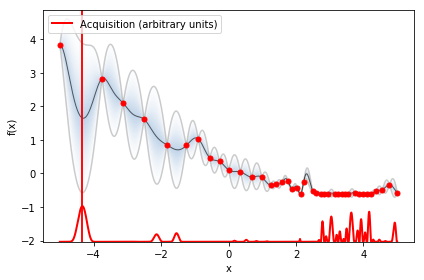

In [15]:
myBopt.plot_acquisition()

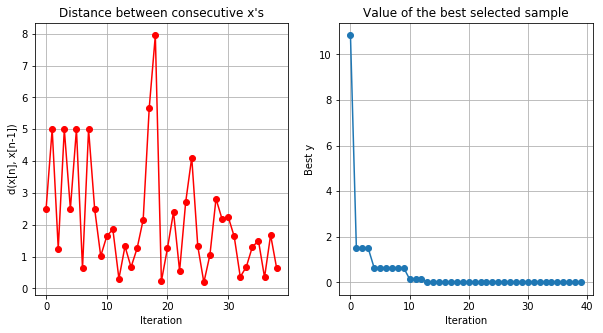

In [16]:
myBopt.plot_convergence()

In [17]:
myBopt.save_report("test")

In [18]:
myBopt.x_opt

array([ 3.87716844])

In [19]:
myBopt.fx_opt

array([ 0.00060061])

In [20]:
# now get the likelihood -> mean and var of the posterior f(theta)|epsilon ~ N(mu_t, v_t)
X,Y = myBopt.get_evaluations()

In [21]:
myBopt.Y.shape

(40, 1)

In [22]:
myBopt.model.get_model_parameters_names(), myBopt.model.get_model_parameters()

(['Mat52.variance', 'Mat52.lengthscale', 'Gaussian_noise.variance'],
 array([[  1.51795792e+00,   4.06179265e-01,   1.00000000e-06]]))

In [23]:
myBopt.model.model

GP_regression.,value,constraints,priors
Mat52.variance,1.51795791994,+ve,
Mat52.lengthscale,0.406179264786,+ve,
Gaussian_noise.variance,1e-06,fixed +ve,


In [24]:
 myBopt.model.model.Mat52 #length scale are the lambdas of the kernel, variance is the variance of the kernel like in the paper

Mat52.,value,constraints,priors
variance,1.51795791994,+ve,
lengthscale,0.406179264786,+ve,


In [295]:
myBopt.model.model.Gaussian_noise # the signal noise which is added to the kernel matrix

Gaussian_noise.,value,constraints,priors
variance,1e-06,+ve fixed,


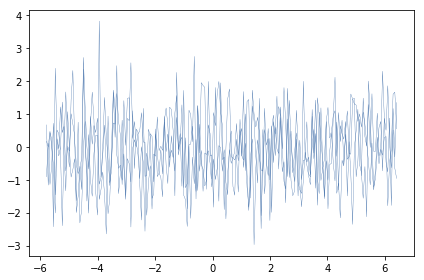

In [296]:
myBopt.model.model.plot_samples()

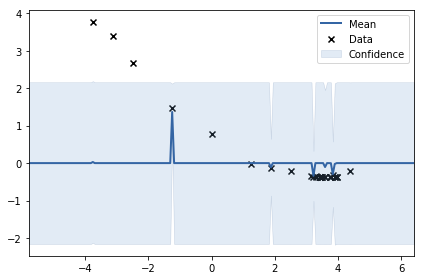

In [297]:
myBopt.model.model.plot()

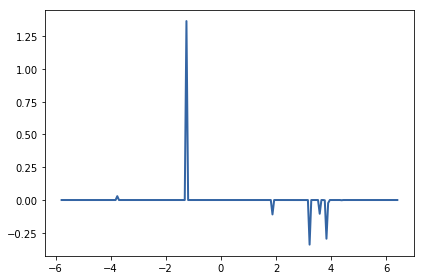

In [298]:
myBopt.model.model.plot_mean()

In [299]:
myBopt.model.model.mean_function

In [121]:
# rebuild posterior
# mean is set to zero?
thetas, f_values = myBopt.get_evaluations()

In [138]:
K = myBopt.model.model.kern.K(thetas)
k = lambda x: myBopt.model.model.kern.K(x, thetas)

In [151]:
k(np.array([[1]]))

array([[ 4.47329154,  4.18353668,  2.66388073,  3.64012268,  3.2469205 ,
         4.71871841,  1.81098851,  2.21342706,  4.53202788,  2.75866195,
         2.29999126,  3.36171876,  3.32142063,  3.30873683,  3.39936454,
         3.84125518,  3.41039334,  3.47419525,  2.97998486,  2.97116307,
         3.63142409,  2.65876492,  3.11474732,  3.92854836,  3.32348525,
         3.32114519,  3.31719795,  3.31004039,  3.29227638,  3.1494487 ,
         3.14684034,  3.14117288,  3.13486267,  3.35011927,  3.37358909,
         3.3900419 ,  3.36958673,  3.33789879,  3.21127641,  3.20480981]])

In [135]:
myBopt.model.model.kern.K_of_r

[GP_regression.Mat52.variance:
 Param([ 4.73620962]), GP_regression.Mat52.lengthscale:
 Param([ 3.7457158])]

In [157]:
def mu_t(theta):
    return np.dot(k(theta), np.dot(np.linalg.inv(K), f_values))

In [182]:
mu_t(np.array([[1],[2]])) 

array([[ 5.8125],
       [ 4.625 ]])

In [163]:
def v_t(theta):
    return myBopt.model.model.kern.K(theta,theta) - np.dot(k(theta), np.dot(np.linalg.inv(K), k(theta).T))

In [183]:
v_t(np.array([[1],[2]]))

array([[-0.55856139, -1.7411837 ],
       [-0.91875912, -2.42339613]])

In [165]:
J_t = lambda x: mu_t(x)

In [198]:
L_ut = lambda x, h: ss.norm.cdf((h-mu_t(x)) / np.sqrt(v_t(x) + myBopt.model.model.kern.variance))

In [235]:
x = np.linspace(-5,5,(5-(-5)) * 30)
x = x.reshape(x.shape[0], 1)
y = np.array([L_ut(np.array([x]), 1) for x in x]).flatten()
indices = np.isnan(y)
y = y[~indices]
x = x[~indices]

In [237]:
x[np.argmax(y)]

array([ 3.9632107])

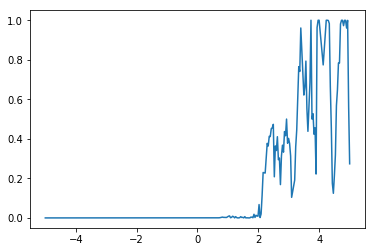

In [236]:
plt.plot(x,y)
plt.show()

In [26]:
# GPyOpt model.predict gives posterior mean and sd!
thetas = myBopt.get_evaluations()[0]

array([[ 0.10487448],
       [-0.52191573],
       [ 1.61193371],
       [ 0.83460582],
       [-0.5791081 ],
       [-0.34953234],
       [ 2.82484159],
       [ 2.09742457],
       [-0.45862295],
       [-0.51921529],
       [-0.61273461],
       [-0.57106547],
       [-0.59694825],
       [-0.62125266],
       [-0.33299478],
       [-0.61808589],
       [-0.61664343],
       [-0.10718172],
       [ 3.82045943],
       [-0.59682627],
       [-0.61414315],
       [-0.61699376],
       [-0.24930952],
       [-0.61284362],
       [ 0.47174255],
       [-0.61455489],
       [-0.2416556 ],
       [-0.44088875],
       [-0.11622261],
       [ 0.85082159],
       [ 0.04800015],
       [-0.57377532],
       [-0.6046325 ],
       [-0.62254025],
       [-0.48300225],
       [-0.62068321],
       [-0.21778248],
       [-0.32056457],
       [ 0.35933155],
       [ 1.02767956]])

In [30]:
L_ut = lambda x, h: (h - myBopt.model.predict(x)[0])/np.sqrt(np.power(myBopt.model.predict(x)[1],2) + myBopt.model.model.kern.variance)

In [31]:
L_ut(np.array([[1],[2]]), 0.1)

array([[ 0.18272681],
       [ 0.38934481]])

In [57]:
x = np.linspace(0,10,10 * 30)
x = x.reshape(x.shape[0], 1)
y = L_ut(x, 0.1) / np.sum(y) # normalize to get proper pdf!

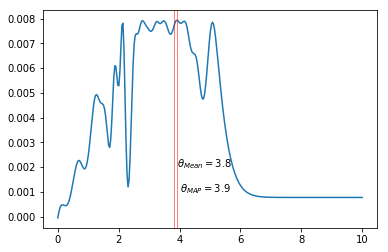

In [61]:
plt.plot(x,y)
x_map = x[np.argmax(y)]
x_mean = np.sum(np.multiply(x,y)).reshape(1,1)
y_mean = myBopt.model.predict(x_mean)
plt.axvline(x_map, color="r", linewidth=0.5)
plt.text(x_map+0.1, 0.001, r"$\theta_{{MAP}} = ${}".format(np.round(x_opt[0], 1)))
plt.axvline(x_mean, color="r", linewidth=0.5)
plt.text(x_mean+0.1, 0.002, r"$\theta_{{Mean}} = ${}".format(np.round(x_mean[0][0], 1)))
plt.show()

In [56]:
x*y

array([[ -0.00000000e+00],
       [  4.41732846e-04],
       [  1.67402771e-03],
       [  3.20815492e-03],
       [  4.68491196e-03],
       [  5.91419942e-03],
       [  6.87842175e-03],
       [  7.72156870e-03],
       [  8.73441288e-03],
       [  1.03293366e-02],
       [  1.29869763e-02],
       [  1.71603117e-02],
       [  2.31518905e-02],
       [  3.10547326e-02],
       [  4.07797408e-02],
       [  5.20874500e-02],
       [  6.45860329e-02],
       [  7.76956268e-02],
       [  9.06106638e-02],
       [  1.02321755e-01],
       [  1.11773518e-01],
       [  1.18197945e-01],
       [  1.21514467e-01],
       [  1.22420950e-01],
       [  1.22161367e-01],
       [  1.22280312e-01],
       [  1.24465065e-01],
       [  1.30443104e-01],
       [  1.41851516e-01],
       [  1.60013730e-01],
       [  1.85624100e-01],
       [  2.18426276e-01],
       [  2.57182885e-01],
       [  2.99888634e-01],
       [  3.43851812e-01],
       [  3.85722585e-01],
       [  4.21772280e-01],
 